<h1 style="font-size:2.1em;
           font-family: Calibri
           padding: 20px;
           margin: 20px;
           height: 100px;
           line-height: 100px;
           align-items: center;
           text-align: center;
           border: 3px solid #006400;
           background-color: #f1f1f1;
           "> Analysing the Tweets </h1>

In [91]:
#import packages
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import nltk

from nltk.util import ngrams
from bs4 import BeautifulSoup


from datetime import datetime, timedelta

In [92]:
UALTweets = pd.read_csv("./Data/CompanyTweets/Tweets UAL 20200119 to 20200418.csv")
UALTweets['Tokens'] = UALTweets.Text.apply(lambda x: [x for x in ngrams(x.strip().split(' '),1)])
UALTweets['Bigrams'] = UALTweets.Text.apply(lambda x: [x for x in ngrams(x.strip().split(' '),2)])
UALTweets.head()

,Created,Text,User,Company,Symbol,TwitterTerm,Tokens,Bigrams
0,2020-04-17,"#LosAngeles to Kigali, Rwanda for only $624 ro...",SecretFlying,United Airlines Holdings Inc.,UAL,@united,"[(#LosAngeles,), (to,), (Kigali,,), (Rwanda,),...","[(#LosAngeles, to), (to, Kigali,), (Kigali,, R..."
1,2020-04-17,@ United paid how much in Taxes last year? I a...,TrickyWizard,United Airlines Holdings Inc.,UAL,@united,"[(@,), (United,), (paid,), (how,), (much,), (i...","[(@, United), (United, paid), (paid, how), (ho..."
2,2020-04-17,I support @united but to be hold an hour. Spea...,iamKimAlbert,United Airlines Holdings Inc.,UAL,@united,"[(I,), (support,), (@united,), (but,), (to,), ...","[(I, support), (support, @united), (@united, b..."
3,2020-04-17,#unitedAIRLINES please tell ur call center age...,iamKimAlbert,United Airlines Holdings Inc.,UAL,@united,"[(#unitedAIRLINES,), (please,), (tell,), (ur,)...","[(#unitedAIRLINES, please), (please, tell), (t..."
4,2020-04-17,.@united in Denver your cleaning staff and fli...,CindyKChambers,United Airlines Holdings Inc.,UAL,@united,"[(.@united,), (in,), (Denver,), (your,), (clea...","[(.@united, in), (in, Denver), (Denver, your),..."


### Looking at Sentiment Correlation with Price

In [100]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [101]:
SentimentIntensityAnalyzer().polarity_scores("Probably the best coffee place in SJ. Super friendly staff")

{'compound': 0.9062, 'neg': 0.0, 'neu': 0.383, 'pos': 0.617}

In [102]:
UALTweets.head()

,Created,Text,User,Company,Symbol,TwitterTerm,Tokens,Bigrams
0,2020-04-17,"#LosAngeles to Kigali, Rwanda for only $624 ro...",SecretFlying,United Airlines Holdings Inc.,UAL,@united,"[(#LosAngeles,), (to,), (Kigali,,), (Rwanda,),...","[(#LosAngeles, to), (to, Kigali,), (Kigali,, R..."
1,2020-04-17,@ United paid how much in Taxes last year? I a...,TrickyWizard,United Airlines Holdings Inc.,UAL,@united,"[(@,), (United,), (paid,), (how,), (much,), (i...","[(@, United), (United, paid), (paid, how), (ho..."
2,2020-04-17,I support @united but to be hold an hour. Spea...,iamKimAlbert,United Airlines Holdings Inc.,UAL,@united,"[(I,), (support,), (@united,), (but,), (to,), ...","[(I, support), (support, @united), (@united, b..."
3,2020-04-17,#unitedAIRLINES please tell ur call center age...,iamKimAlbert,United Airlines Holdings Inc.,UAL,@united,"[(#unitedAIRLINES,), (please,), (tell,), (ur,)...","[(#unitedAIRLINES, please), (please, tell), (t..."
4,2020-04-17,.@united in Denver your cleaning staff and fli...,CindyKChambers,United Airlines Holdings Inc.,UAL,@united,"[(.@united,), (in,), (Denver,), (your,), (clea...","[(.@united, in), (in, Denver), (Denver, your),..."


In [103]:
def CreateScore(df = df, Type='compound'):
    analyzer = SentimentIntensityAnalyzer()
    df[Type] = [analyzer.polarity_scores(x)[Type] for x in df['Text']]   
    
CreateScore(UALTweets, 'neg')
CreateScore(UALTweets, 'neu')
CreateScore(UALTweets, 'pos')
CreateScore(UALTweets, 'compound')
UALTweets.head()

,Created,Text,User,Company,Symbol,TwitterTerm,Tokens,Bigrams,neg,neu,pos,compound
0,2020-04-17,"#LosAngeles to Kigali, Rwanda for only $624 ro...",SecretFlying,United Airlines Holdings Inc.,UAL,@united,"[(#LosAngeles,), (to,), (Kigali,,), (Rwanda,),...","[(#LosAngeles, to), (to, Kigali,), (Kigali,, R...",0.000,1.000,0.000,0.0000
1,2020-04-17,@ United paid how much in Taxes last year? I a...,TrickyWizard,United Airlines Holdings Inc.,UAL,@united,"[(@,), (United,), (paid,), (how,), (much,), (i...","[(@, United), (United, paid), (paid, how), (ho...",0.036,0.728,0.236,0.8261
2,2020-04-17,I support @united but to be hold an hour. Spea...,iamKimAlbert,United Airlines Holdings Inc.,UAL,@united,"[(I,), (support,), (@united,), (but,), (to,), ...","[(I, support), (support, @united), (@united, b...",0.080,0.873,0.047,-0.3091
3,2020-04-17,#unitedAIRLINES please tell ur call center age...,iamKimAlbert,United Airlines Holdings Inc.,UAL,@united,"[(#unitedAIRLINES,), (please,), (tell,), (ur,)...","[(#unitedAIRLINES, please), (please, tell), (t...",0.080,0.750,0.170,0.3956
4,2020-04-17,.@united in Denver your cleaning staff and fli...,CindyKChambers,United Airlines Holdings Inc.,UAL,@united,"[(.@united,), (in,), (Denver,), (your,), (clea...","[(.@united, in), (in, Denver), (Denver, your),...",0.171,0.730,0.099,-0.4740


In [104]:
UALTweets.sort_values('pos', ascending=False).head(10)

,Created,Text,User,Company,Symbol,TwitterTerm,Tokens,Bigrams,neg,neu,pos,compound
6113,2020-03-14,Please help @united,a___ndres,United Airlines Holdings Inc.,UAL,@united,"[(Please,), (help,), (@united,)]","[(Please, help), (help, @united)]",0.0,0.167,0.833,0.6124
16575,2020-01-24,Well played @United. Well played. https://t.co...,theHappyMedic,United Airlines Holdings Inc.,UAL,@united,"[(Well,), (played,), (@United.,), (Well,), (pl...","[(Well, played), (played, @United.), (@United....",0.0,0.182,0.818,0.7906
10692,2020-02-26,.@united HELP!!!,MichelleHargrov,United Airlines Holdings Inc.,UAL,@united,"[(.@united,), (HELP!!!,)]","[(.@united, HELP!!!)]",0.0,0.188,0.812,0.6496
8444,2020-03-07,Thanks @united! Cool gift. https://t.co/fmBkvM...,jwittich,United Airlines Holdings Inc.,UAL,@united,"[(Thanks,), (@united!,), (Cool,), (gift.,), (h...","[(Thanks, @united!), (@united!, Cool), (Cool, ...",0.0,0.192,0.808,0.8122
19622,2020-02-22,Well thank heavens @UnitedAirlines_ https://t....,abaesel2,United Airlines Holdings Inc.,UAL,UnitedAirlines,"[(Well,), (thank,), (heavens,), (@UnitedAirlin...","[(Well, thank), (thank, heavens), (heavens, @U...",0.0,0.215,0.785,0.7430
16461,2020-01-25,"Well played @united , well played #ToTheMounta...",Skicom,United Airlines Holdings Inc.,UAL,@united,"[(Well,), (played,), (@united,), (,,), (well,)...","[(Well, played), (played, @united), (@united, ...",0.0,0.250,0.750,0.7906
3595,2020-03-22,Proud united @united https://t.co/PFm7boBx6n,dchavezmaza,United Airlines Holdings Inc.,UAL,@united,"[(Proud,), (united,), (@united,), (https://t.c...","[(Proud, united), (united, @united), (@united,...",0.0,0.253,0.747,0.7096
20697,2020-01-28,"Solved! Thanks, @UnitedAirlines_ ! https://t...",schultzmedia,United Airlines Holdings Inc.,UAL,UnitedAirlines,"[(Solved!,), (,), (,), (Thanks,,), (@UnitedAir...","[(Solved!, ), (, ), (, Thanks,), (Thanks,, @Un...",0.0,0.264,0.736,0.6792
9338,2020-03-04,"Nicely played, @united https://t.co/g7qZOPMg3j",EGonzalez6,United Airlines Holdings Inc.,UAL,@united,"[(Nicely,), (played,,), (@united,), (https://t...","[(Nicely, played,), (played,, @united), (@unit...",0.0,0.274,0.726,0.6486
6783,2020-03-12,"yes, please! @united https://t.co/adMBxUIxXO",baris_kesgin,United Airlines Holdings Inc.,UAL,@united,"[(yes,,), (please!,), (@united,), (https://t.c...","[(yes,, please!), (please!, @united), (@united...",0.0,0.274,0.726,0.6476


In [105]:
#get a company's ticker using a key
quandl.ApiConfig.api_key = ''

#Get list of tickers
ticker = pd.read_csv('../Winners/ticker_list.csv')

In [106]:
ticker[ticker['Exchange']=="NASDAQ"].head()

,Ticker,Quandl_Code,Name,Exchange,Last Trade Date
4,AACG,EOD/AACG,ATA Creativity Global,NASDAQ,2021-01-15
5,AACQ,EOD/AACQ,Artius Acquisition Inc.,NASDAQ,2021-01-15
6,AACQU,EOD/AACQU,Artius Acquisition Inc. Unit consisting of one...,NASDAQ,2021-01-15
7,AACQW,EOD/AACQW,Artius Acquisition Inc. Warrant,NASDAQ,2021-01-15
12,AAL,EOD/AAL,American Airlines Group Inc.,NASDAQ,2021-01-15


In [107]:
# stock price (Feb 19 2020 - April 18 2020)
AAL_stock_In = quandl.get("EOD/AAL", start_date='2020-1-19', end_date='2020-4-18')
# PYPL_stock = quandl.get("EOD/PYPL", start_date='2020-2-19', end_date='2020-4-18')
# ZM_stock = quandl.get("EOD/ZM", start_date='2020-2-19', end_date='2020-4-18')

In [132]:
UAL_Summary = UALTweets.pivot_table(index= 'Created', values=['neg','neu','pos','compound'], aggfunc=np.mean)
UAL_Summary.index.names = ['Date']
UAL_Summary.index = pd.to_datetime(UAL_Summary.index)
UAL_Summary.head()

,compound,neg,neu,pos
Date,,,,
2020-01-19,0.201184,0.050076,0.829849,0.120070
2020-01-20,0.129493,0.065812,0.827771,0.106426
2020-01-21,0.185712,0.038755,0.864069,0.097186
2020-01-22,0.150676,0.049811,0.845186,0.105000
2020-01-23,0.248273,0.044269,0.824889,0.130861


In [133]:
AAL_stock = AAL_stock_In
AAL_stock.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2020-04-13,12.90,12.950,11.25,11.560,73385533.0,0.0,1.0,12.90,12.950,11.25,11.560,73385533.0
2020-04-14,12.22,12.600,11.75,11.945,68039491.0,0.0,1.0,12.22,12.600,11.75,11.945,68039491.0
2020-04-15,12.52,12.690,11.39,12.290,124719945.0,0.0,1.0,12.52,12.690,11.39,12.290,124719945.0
2020-04-16,11.91,12.030,11.05,11.070,83626979.0,0.0,1.0,11.91,12.030,11.05,11.070,83626979.0
2020-04-17,11.87,11.945,11.50,11.570,61279474.0,0.0,1.0,11.87,11.945,11.50,11.570,61279474.0


In [134]:
print(UAL_Summary.index.to_frame().dtypes)
print(AAL_stock.index.to_frame().dtypes)

Date    datetime64[ns]
dtype: object
Date    datetime64[ns]
dtype: object


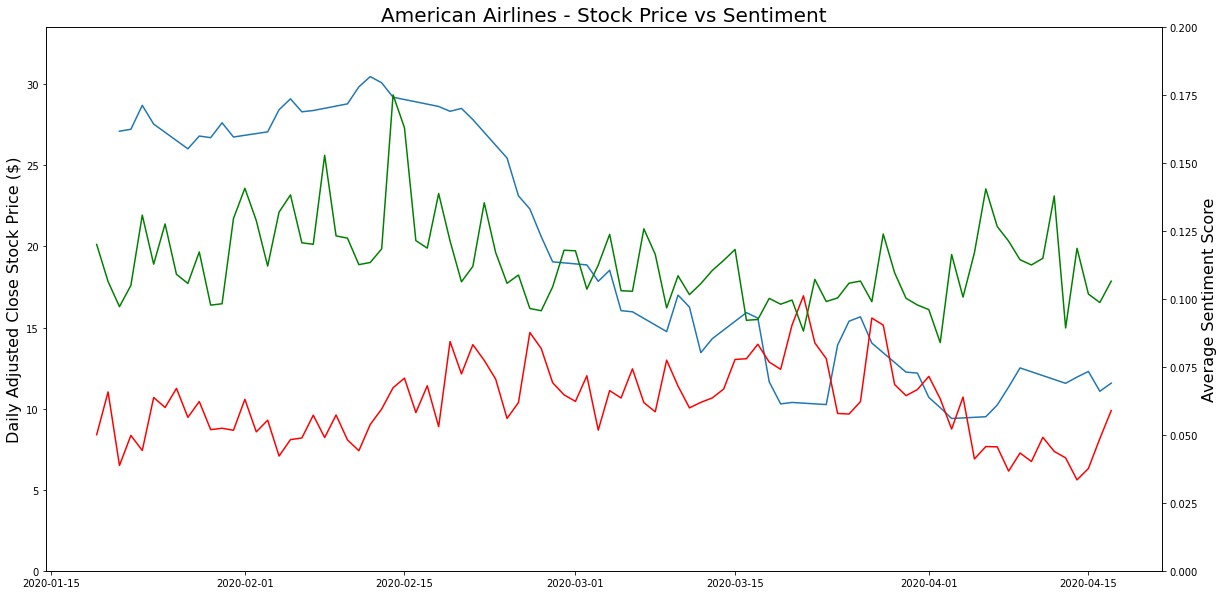

In [139]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ax1.plot(AAL_stock.index, AAL_stock['Adj_Close'])
ax2 = ax1.twinx()
ax2.plot(UAL_Summary.index,UAL_Summary['neg'], color='red')
ax2.plot(UAL_Summary.index,UAL_Summary['pos'], color='green')
#ax2.plot(UAL_Summary.index,UAL_Summary['compound'], color='orange')

ax1.set_title('American Airlines - Stock Price vs Sentiment' ,size=20)
ax1.set_ylabel('Daily Adjusted Close Stock Price ($)' ,size=16)
ax2.set_ylabel('Average Sentiment Score' ,size=16)
ax1.set_ylim(0,max(AAL_stock['Adj_Close'])*1.1)
ax2.set_ylim(0,0.2)
plt.show()

### Looking at Covid Terms Correlation With Price

In [127]:
ListofCovidTerms = ['coronavirus', 'covid', 'covid19','mask', '#coronavirus', '#covid','#covid19','#mask']
pattern = "|".join(ListofCovidTerms)

# Make tweets lower case, see if it contains any any of the terms
UALTweets['CovidTermContained'] = UALTweets.Text.apply(lambda x: x.lower()).str.contains(pattern).apply(lambda x: int(x))
UALTweets[UALTweets['CovidTermContained']==1].head().Text.values

array([".@united in Denver your cleaning staff and flight crews are *not* wearing gloves or masks. How is this safe?! You're putting others, including someone I love, at risk. So much for sanitizing the plane. WTF?",
       "Getting our nation's healthcare heroes where they're needed most: 25 caregivers from @Clevelandclinic departed for New York City to help @nyphospital treat COVID-19 patients.\n\nWe are humbled by your fighting spirit and forever grateful for your service. #UnitedTogether https://t.co/5KV0mdCW4S",
       "Our flight got cancelled due to the covid19 virus, so we cancelled our flight.  We have a credit and can only use it through same previous airport for our layovers.  Guess we'll be adding @united to the never use again.  How incredibly frustrating",
       "Hey @united! You are going against @USDOT enforcement letter (April 3) and refusing to refund me. Not cool. \nWhy won't you play fair and just refund my family? \nI am a paramedic working on the front lines of #

Seems to be the case that there is Covid related tweets in the ones picked out!

In [141]:
UAL_Summary = UALTweets.pivot_table(index= 'Created', values=['CovidTermContained'], aggfunc=np.sum)
UAL_Summary.index.names = ['Date']
UAL_Summary.index = pd.to_datetime(UAL_Summary.index)
UAL_Summary.head()

,CovidTermContained
Date,
2020-01-19,0
2020-01-20,5
2020-01-21,17
2020-01-22,6
2020-01-23,4


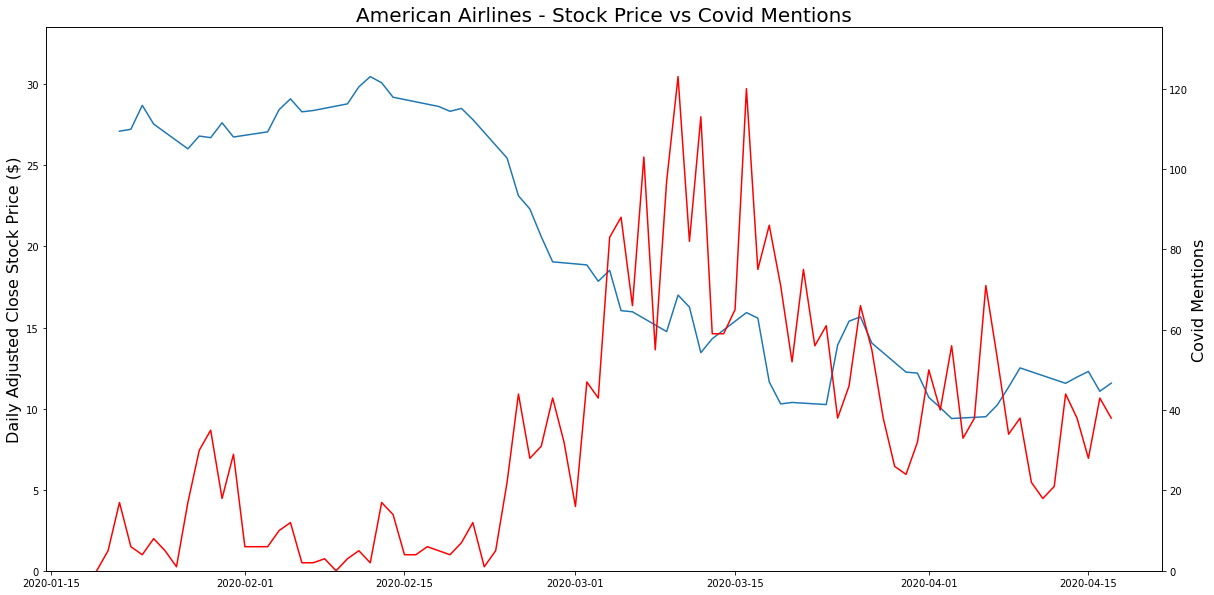

In [143]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ax1.plot(AAL_stock.index, AAL_stock['Adj_Close'])
ax2 = ax1.twinx()
ax2.plot(UAL_Summary.index,UAL_Summary['CovidTermContained'], color='red')

ax1.set_title('American Airlines - Stock Price vs Covid Mentions' ,size=20)
ax1.set_ylabel('Daily Adjusted Close Stock Price ($)' ,size=16)
ax2.set_ylabel('Covid Mentions' ,size=16)
ax1.set_ylim(0,max(AAL_stock['Adj_Close'])*1.1)
ax2.set_ylim(0,max(UAL_Summary['CovidTermContained'])*1.1)
plt.show()